In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt   
import seaborn as sns
import datetime as dt 
from matplotlib.dates import date2num
from prophet import Prophet
import matplotlib.dates as mdates
from matplotlib.dates import date2num, num2date
import statsmodels.api as sm
from scipy import stats

from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
start_date= datetime.now()-pd.DateOffset(months=75)
end_date= datetime.now()

In [3]:
tickers= ['NVDA',' ESTC','ADBE','MSFT','AMD']

In [4]:
df_list=[]

for ticker in tickers:
    data=yf.download(ticker,start=start_date,end=end_date)
    df_list.append(data)

stocks=pd.concat(df_list,keys=tickers,names=['Ticker','Date'])
stocks.tail()                     

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AMD    2024-04-09  170.210007  171.600006  167.289993  170.779999  170.779999   
       2024-04-10  166.710007  169.779999  164.000000  167.139999  167.139999   
       2024-04-11  167.550003  170.949997  166.550003  170.500000  170.500000   
       2024-04-12  164.529999  165.699997  161.820007  163.279999  163.279999   
       2024-04-15  164.429993  164.440002  158.759995  160.320007  160.320007   

                     Volume  
Ticker Date                  
AMD    2024-04-09  42928000  
       2024-04-10  59600000  
       2024-04-11  48994500  
       2024-04-12  63334200  
       2024-04-15  61388300

In [5]:
stocks=stocks.reset_index()
stocks.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,NVDA,2018-01-16,56.012501,56.877499,54.172501,55.027500,54.445599,70234800
1,NVDA,2018-01-17,55.174999,56.279999,54.224998,56.180000,55.585903,53840800
2,NVDA,2018-01-18,55.985001,56.660000,55.669998,56.110001,55.516632,40863200
3,NVDA,2018-01-19,57.022499,57.772499,56.750000,57.527500,56.919151,60938000
4,NVDA,2018-01-22,57.607498,58.439999,57.025002,58.422501,57.804699,55094400


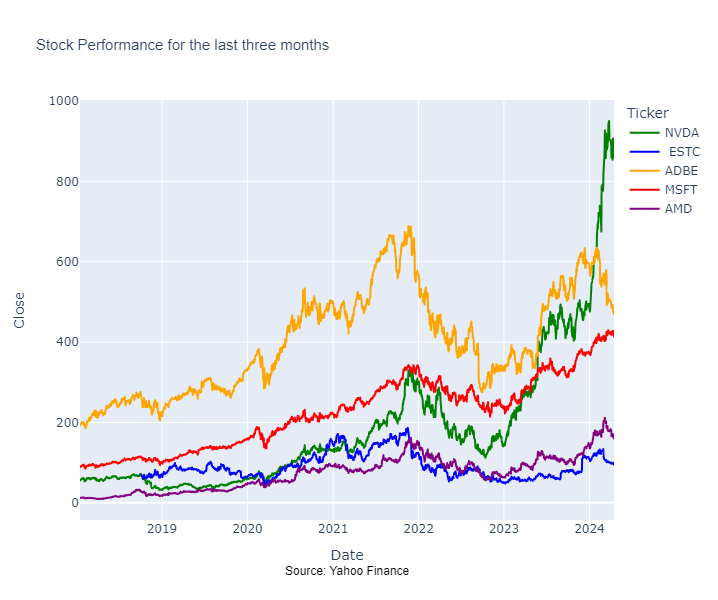

In [6]:
labels = ['NVDA', 'ESTC', 'ADBE', 'MSFT','AMD']
colors = ['green', 'blue', 'orange', 'red','purple']

#
fig = px.line(stocks, x='Date', y='Close', color='Ticker',title="Stock Performance for the last three months",height=600, width=1000)

for i, label in enumerate(labels):
    fig.data[i].line.color = colors[i]
    fig.data[i].line.width = 2  


fig.update_layout(title_font=dict(family='Arial', size=15))

fig.add_annotation(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                    text='Source: Yahoo Finance',
                    font=dict(family='Arial', size=12, color='black'), showarrow=False)


fig.show()                                     

In [7]:
nvda_stocks=stocks[stocks['Ticker']=='NVDA']
print(nvda_stocks.head(),'\n',nvda_stocks.tail())

  Ticker       Date       Open       High        Low      Close  Adj Close  \
0   NVDA 2018-01-16  56.012501  56.877499  54.172501  55.027500  54.445599   
1   NVDA 2018-01-17  55.174999  56.279999  54.224998  56.180000  55.585903   
2   NVDA 2018-01-18  55.985001  56.660000  55.669998  56.110001  55.516632   
3   NVDA 2018-01-19  57.022499  57.772499  56.750000  57.527500  56.919151   
4   NVDA 2018-01-22  57.607498  58.439999  57.025002  58.422501  57.804699   

     Volume  
0  70234800  
1  53840800  
2  40863200  
3  60938000  
4  55094400   
      Ticker       Date        Open        High         Low       Close  \
1567   NVDA 2024-04-09  874.419983  876.349976  830.219971  853.539978   
1568   NVDA 2024-04-10  839.260010  874.000000  837.090027  870.390015   
1569   NVDA 2024-04-11  874.200012  907.390015  869.260010  906.159973   
1570   NVDA 2024-04-12  896.989990  901.750000  875.299988  881.859985   
1571   NVDA 2024-04-15  890.979980  906.130005  859.289978  860.010010   



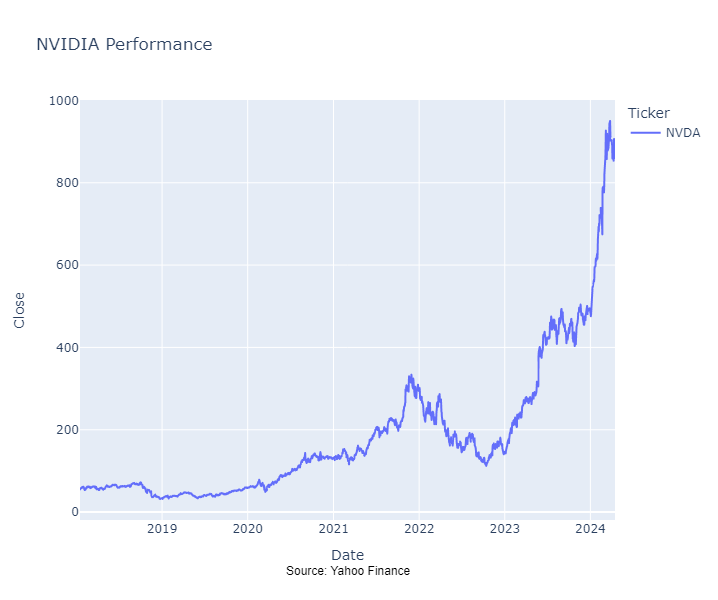

In [8]:
fig = px.line(nvda_stocks, x='Date', y='Close', color='Ticker',title="NVIDIA Performance",height=600, width=800)

fig.add_annotation(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                    text='Source: Yahoo Finance',
                    font=dict(family='Arial', size=12, color='black'), showarrow=False)

fig.show()

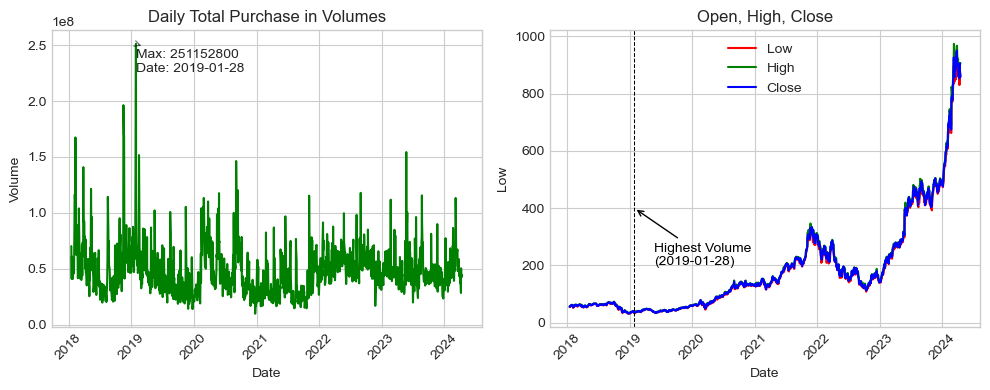

In [9]:
f, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 4]))

sns.lineplot(data=nvda_stocks, x="Date", y="Volume", color='green', ax=axs[0])
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=nvda_stocks, x="Date", y='Low', color='red', ax=axs[1],label='Low')
sns.lineplot(data=nvda_stocks, x="Date", y='High', color='green', ax=axs[1],label='High')
sns.lineplot(data=nvda_stocks, x="Date", y='Close', color='blue', ax=axs[1],label='Close')
axs[1].grid(True)

axs[1].tick_params(axis='x', rotation=45)

min_index = nvda_stocks['Volume'].idxmin()
min_value = nvda_stocks.loc[min_index, 'Volume']
min_date = nvda_stocks.loc[min_index, 'Date']

max_index = nvda_stocks['Volume'].idxmax()
max_value = nvda_stocks.loc[max_index, 'Volume']
max_date = nvda_stocks.loc[max_index, 'Date']


min_date_num = date2num(min_date)
max_date_num = date2num(max_date)

axs[0].annotate(f'Max: {max_value:.0f}\nDate: {num2date(max_date_num).strftime("%Y-%m-%d")}', xy=(max_date_num, max_value),
                xytext=(max_date_num, max_value - 5000000), ha='left', va='top',
                arrowprops=dict(facecolor='blue', arrowstyle='<-', alpha=0.5))


volume_dt = dt.datetime(2019, 1, 28)
volume_label = 'Highest Volume\n(' + volume_dt.strftime('%Y-%m-%d') + ')'

axs[1].axvline(x=volume_dt, color='black', linewidth=0.75, linestyle='--')
axs[1].annotate(volume_label, xy=(volume_dt, 400), xytext=(dt.datetime(2019, 5, 25), 200),
                arrowprops={'facecolor': 'black', 'arrowstyle': '->'}, color='black')

axs[0].set_title('Daily Total Purchase in Volumes')
axs[1].set_title('Open, High, Close')
f.tight_layout()
plt.legend()
plt.show()


In [10]:
m = Prophet()

nvda_new = nvda_stocks.drop(['Open', 'High', 'Low','Volume', 'Ticker','Adj Close'], axis=1)
nvda_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

nvda_new.tail()

,ds,y
1567,2024-04-09,853.539978
1568,2024-04-10,870.390015
1569,2024-04-11,906.159973
1570,2024-04-12,881.859985
1571,2024-04-15,860.010010


In [11]:
m = Prophet()

m.fit(nvda_new)

11:50:45 - cmdstanpy - INFO - Chain [1] start processing
11:50:45 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_prices = m.make_future_dataframe(periods=365)

# Stock Price prediction
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1932,2025-04-11,1247.036430,1143.222127,1362.014334
1933,2025-04-12,1244.872574,1134.989691,1357.987655
1934,2025-04-13,1244.365240,1133.962593,1358.153350
1935,2025-04-14,1246.393701,1135.018356,1361.483235
1936,2025-04-15,1244.888152,1141.177388,1363.808230


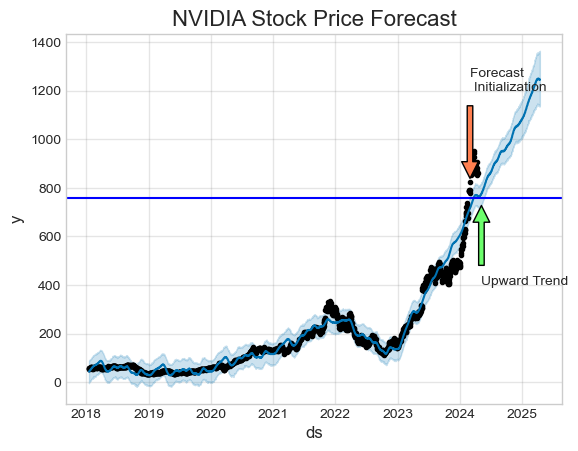

In [13]:
starting_date = dt.datetime(2024, 3, 1)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2024, 5, 7)
trend_date1 = mdates.date2num(trend_date)
pointing_arrow = dt.datetime(2024, 3, 1)
pointing_arrow1 = mdates.date2num(pointing_arrow)

fig, ax = plt.subplots()
ax.set_title("NVIDIA Stock Price Forecast", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Close Price", fontsize=12)

m.plot(forecast, ax=ax)

ax.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 800), xytext=(starting_date1, 1200),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

ax.annotate('Upward Trend', xy=(trend_date1, 759), xytext=(trend_date1, 400),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1))

ax.axhline(y=759, color='b', linestyle='-')

plt.show()


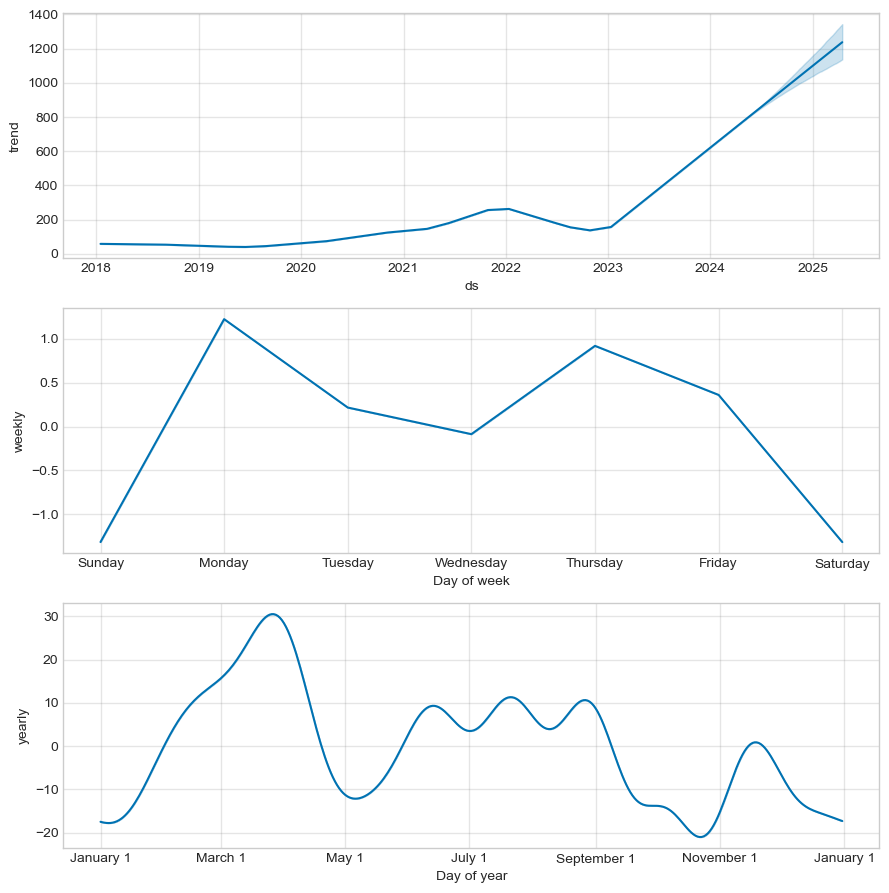

In [14]:
fig2 = m.plot_components(forecast)
plt.show()

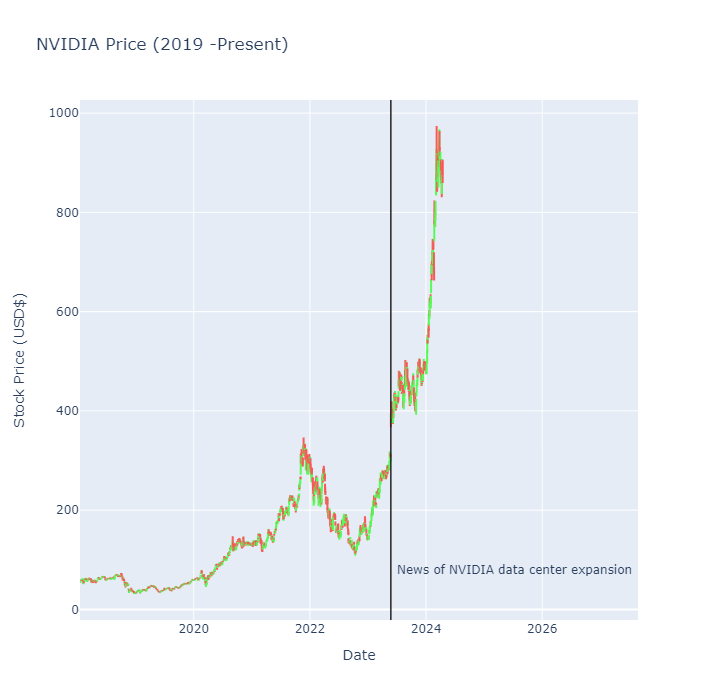

In [15]:
trace = go.Ohlc(x=nvda_stocks['Date'],
                open=nvda_stocks['Open'],
                high=nvda_stocks['High'],
                low=nvda_stocks['Low'],
                close=nvda_stocks['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'NVIDIA Price (2019 -Present)',
    'height':700,
    'width':1000,
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2023-05-25', 'x1': '2023-05-25',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2023-06-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'News of NVIDIA data center expansion <br> '
    }]
}


data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple_ohlc')


11:50:48 - cmdstanpy - INFO - Chain [1] start processing
11:50:48 - cmdstanpy - INFO - Chain [1] done processing


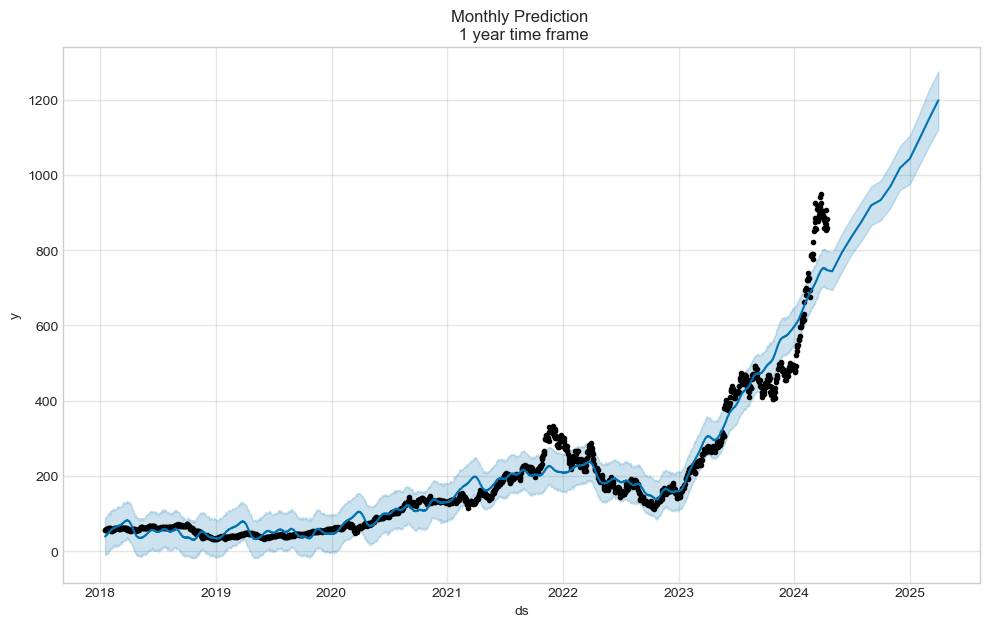

In [16]:
m=Prophet(changepoint_prior_scale=0.01).fit(nvda_new)
future=m.make_future_dataframe(periods=12,freq= 'M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")
plt.show()


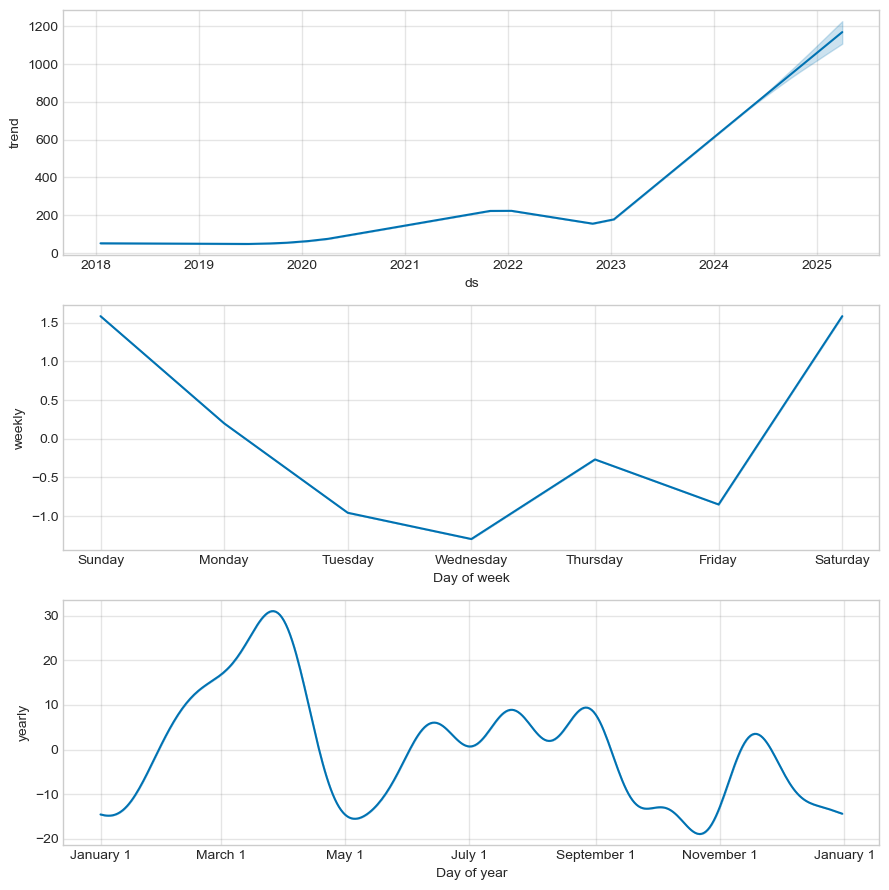

In [17]:
fig=m.plot_components(fcst)
plt.show()

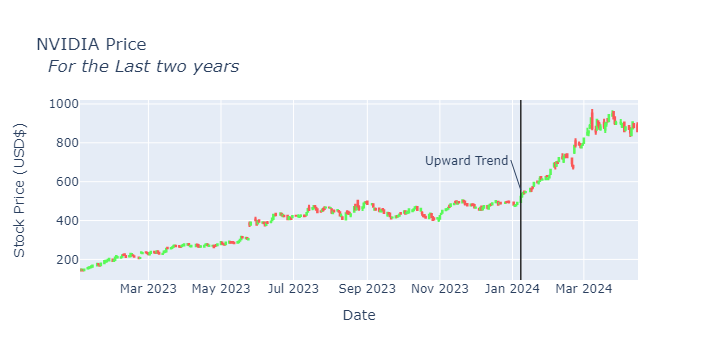

In [18]:
last_two = nvda_stocks[nvda_stocks['Date'].dt.year >2022]
g = last_two.groupby(['Date'])
monthly_avg=g.aggregate({'Open':np.mean,'High':np.mean,'Low':np.mean,'Close':np.mean})
monthly_avg.reset_index(level=0,inplace =True)
trace=go.Candlestick(x=monthly_avg['Date'],
                     open=monthly_avg['Open'].values.tolist(),
                     high=monthly_avg['High'].values.tolist(),
                     low=monthly_avg['Low'].values.tolist(),
                     close=monthly_avg['Close'].values.tolist(),
                     increasing=dict(line=dict(color='#58FA58')),
                     decreasing=dict(line=dict(color='#FA5858')))
layout ={
    'title':'NVIDIA Price <br> <i> For the Last two years </i>',
    'xaxis':{'title': 'Date','rangeslider':{'visible': False}},
    'yaxis':{'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2024-01-08','x1': '2024-01-08',
        'y0': 0, 'y1' :1,'xref':'x','yref':'paper',
        'line':{'color': 'rgb(30,30,30)','width':1}}],
    'annotations': [{
        'x':'2024-01-08','y':0.5,'xref':'x','yref':'paper',
        'showarrow':True,'xanchor':'right','text':'Upward Trend'}
    ]}

data= [trace]
fig =go.Figure(data=data,layout=layout)
iplot(fig,filename='simple_ohlc')

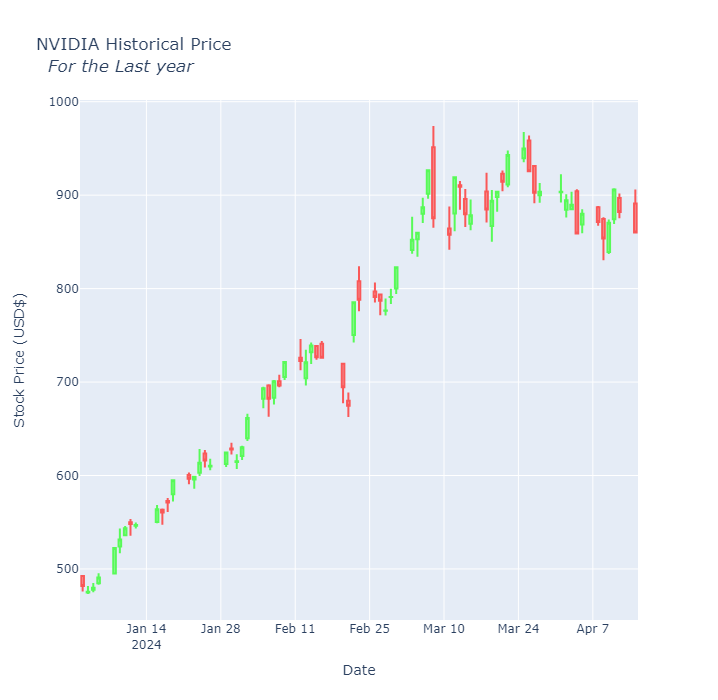

In [19]:
nvda_stocks['month_year']=pd.to_datetime(nvda_stocks['Date']).dt.to_period('M')
last_year = nvda_stocks[nvda_stocks['Date'].dt.year >2023]
g = last_year.groupby(['Date'])
monthly_avg=g.aggregate({'Open':np.mean,'High':np.mean,'Low':np.mean,'Close':np.mean})
monthly_avg.reset_index(level=0,inplace =True)
trace=go.Candlestick(x=monthly_avg['Date'],
                     open=monthly_avg['Open'].values.tolist(),
                     high=monthly_avg['High'].values.tolist(),
                     low=monthly_avg['Low'].values.tolist(),
                     close=monthly_avg['Close'].values.tolist(),
                     increasing=dict(line=dict(color='#58FA58')),
                     decreasing=dict(line=dict(color='#FA5858')))
layout ={
    'height':700,
    'width':900,
    'title':'NVIDIA Historical Price <br> <i> For the Last year </i>',
    'xaxis':{'title': 'Date','rangeslider':{'visible': False}},
    'yaxis':{'title': 'Stock Price (USD$)'}
}

data= [trace]
fig =go.Figure(data=data,layout=layout)
iplot(fig,filename='simple_ohlc')
        


    

In [20]:
nvda_stocks.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,month_year
0,NVDA,2018-01-16,56.012501,56.877499,54.172501,55.027500,54.445599,70234800,2018-01
1,NVDA,2018-01-17,55.174999,56.279999,54.224998,56.180000,55.585903,53840800,2018-01
2,NVDA,2018-01-18,55.985001,56.660000,55.669998,56.110001,55.516632,40863200,2018-01
3,NVDA,2018-01-19,57.022499,57.772499,56.750000,57.527500,56.919151,60938000,2018-01
4,NVDA,2018-01-22,57.607498,58.439999,57.025002,58.422501,57.804699,55094400,2018-01


In [21]:
nvda_stocks['10_d_mvavg']=nvda_stocks['Close'].rolling(window=10).mean()
nvda_stocks['50_d_mvavg']=nvda_stocks['Close'].rolling(window=50).mean()
nvda_stocks['200_d_mvavg']=nvda_stocks['Close'].rolling(window=200).mean()
close_px=nvda_stocks['Close'].values.tolist()

ten_day = nvda_stocks['10_d_mvavg'].values.tolist()
fifty_day = nvda_stocks['50_d_mvavg'].values.tolist()
twohun_day=nvda_stocks['200_d_mvavg'].values.tolist()
nvda_stocks=nvda_stocks.set_index('Date')
nvda_stocks.tail()                                 

,Ticker,Open,High,Low,Close,Adj Close,Volume,month_year,10_d_mvavg,50_d_mvavg,200_d_mvavg
Date,,,,,,,,,,,
2024-04-09,NVDA,874.419983,876.349976,830.219971,853.539978,853.539978,50354700,2024-04,888.346002,808.361000,551.3782
2024-04-10,NVDA,839.260010,874.000000,837.090027,870.390015,870.390015,43192900,2024-04,882.824005,813.275800,553.6197
2024-04-11,NVDA,874.200012,907.390015,869.260010,906.159973,906.159973,43163700,2024-04,883.190002,818.844199,556.1189
2024-04-12,NVDA,896.989990,901.750000,875.299988,881.859985,881.859985,42488900,2024-04,881.020001,824.175999,558.4344
2024-04-15,NVDA,890.979980,906.130005,859.289978,860.010010,860.010010,44145100,2024-04,876.658002,828.770798,560.6786


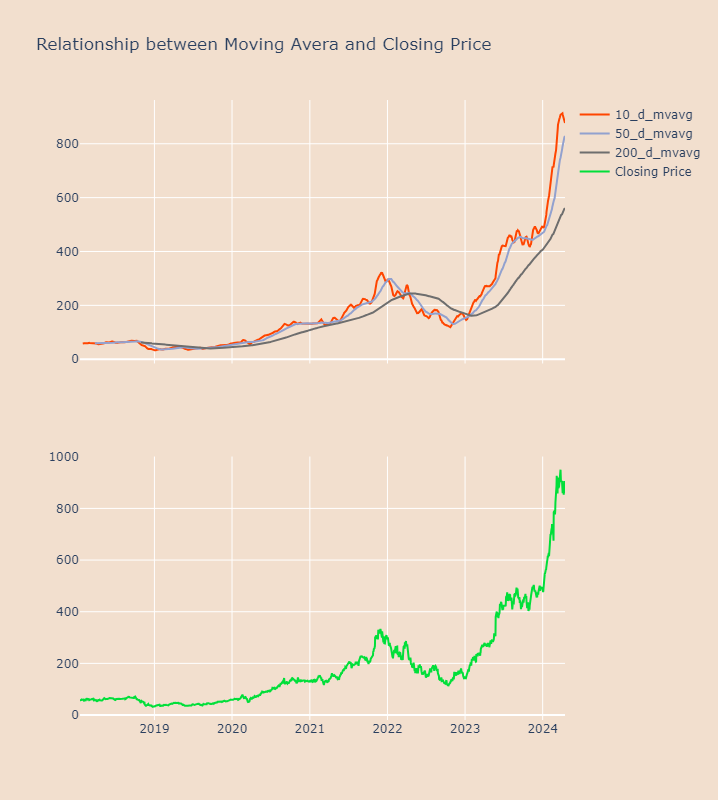

In [22]:
fig = tls.make_subplots(rows=2,cols=1, shared_xaxes= True)
colors=['#ff4500','#92a1cf','#6E6E6E']
avgs=['10_d_mvavg','50_d_mvavg','200_d_mvavg']

for col,c in zip(avgs,colors) :
    fig.append_trace({'x':nvda_stocks.index,'y':nvda_stocks[col],'type':'scatter','name':col,'line': {'color': c}},1,1)

for col in ['Close']:
    fig.append_trace({'x':nvda_stocks.index,'y':nvda_stocks[col],'type':'scatter','name':'Closing Price',
                      'line':{'color':'#01DF3A'}},2,1)
fig['layout'].update(height=800,title='Relationship between Moving Avera and Closing Price',
                         paper_bgcolor='#F2DFCE',plot_bgcolor='#F2DFCE')
iplot(fig,filename='pandas/mixed-type subplots')
                      


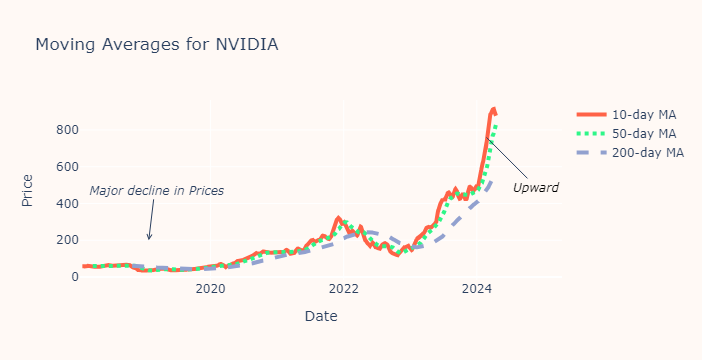

In [23]:
import plotly.graph_objs as go
from plotly.offline import iplot

nvda_stocks = nvda_stocks.reset_index()

trace0 = go.Scatter(
    x = nvda_stocks['Date'],
    y = ten_day,
    name = '10-day MA',
    line = dict(color = '#ff6347', width = 4)
)
trace1 = go.Scatter(
    x = nvda_stocks['Date'],
    y = fifty_day,
    name = '50-day MA',
    line = dict(color = '#2EF688', width = 4, dash = 'dot')
)
trace2 = go.Scatter(
    x = nvda_stocks['Date'],
    y = twohun_day,
    name = '200-day MA',
    line = dict(color = '#92a1cf', width = 4, dash = 'dash')
)

data = [trace0, trace1, trace2]

layout = dict(
    title = 'Moving Averages for NVIDIA',
    xaxis = dict(title = 'Date'),
    yaxis = dict(title = 'Price'),
    annotations = [
        dict(
            x = '2019-01-28',
            y = 200,
            xref = 'x',
            yref = 'y',
            text = '<i> Major decline in Prices',
            showarrow = True,
            arrowhead = 5,
            ax = 6,
            ay = -50
        ),
        dict(
            x = '2024-02-23',
            y = 759,
            text = '<i>Upward',
            textangle = 0,
            ax = 50,
            ay = 50,
            font = dict(
                color = 'black',
                size = 12
            )
        )
    ],
    paper_bgcolor = '#FFF9F5',
    plot_bgcolor = '#FFF9F5'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='styled-line')
